In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, re
import behavior_analysis as ba

In [14]:
def appendRateSummaryResult(result, date, name, target="rate_summary.csv"):
    if not os.path.exists(target):
        with open(target,'a') as outputfile:
            outputfile.write("date,name,hit_rate,false_alarm_rate\n")
        print("create new target file: "+target)
    with open(target,'a') as outputfile:
        outputfile.write("{date},{name},{hit_rate},{false_alarm_rate}\n".format(
            date=date,
            name=name,
            hit_rate=result['hit'],
            false_alarm_rate=result['false_alarm']))

def summary(name, date=None, stimDataName=None, lickDataName=None):
    dir_path = os.path.join("../../data/cage1",name)
    
    if date:
        stimDataFile = [os.path.join(dir_path, item) for item in os.listdir(dir_path) if date in item and 
                        os.path.splitext(item)[1] == ".data" and
                        re.match("^\d",item)]
        
        actualStimDataFile = [os.path.join(dir_path, item) for item in os.listdir(dir_path) if date in item and 
                        os.path.splitext(item)[1] == ".data" and
                        re.match("^a",item)]
        
        lickDataFile = [os.path.join(dir_path, item) for item in os.listdir(dir_path) if '.'.join([date[0:2],date[2:4],date[4:6]]) in item and 
                        os.path.splitext(item)[1] == ".csv" and
                        re.match("^Kaleidoscope",item)]
    else:
        stimDataFile = os.path.join(dir_path, stimDataName)
        
        actualStimDataFile = None
        
        lickDataFile = os.path.join(dir_path, lickDataName)
        
    result, misc = ba.get_behavior_result(stimDataFile[0], lickDataFile[0])  # TODO: process multiple files.
    
    total_trials = result['correct_reject'] + len(result['false_alarm']) + len(result['hit']) + result['miss']
    
    result_rate = {
        'correct_reject': result['correct_reject'] / total_trials,
        'false_alarm': len(result['false_alarm']) / total_trials,
        'hit': len(result['hit']) / total_trials,
        'miss': result['miss'] / total_trials
    }
    if date:
        appendRateSummaryResult(result_rate, date, name)
    
    return result_rate, result, misc

In [15]:
mouseNameList = [
    "Auden",
    "Bartolo",
    "Charles",
    "Dorian",
    "Elliott",
    "Frodo"]

today = "180320"

for mouse in mouseNameList:
    try:
        summary(mouse, date=today)
    except IndexError:
        continue

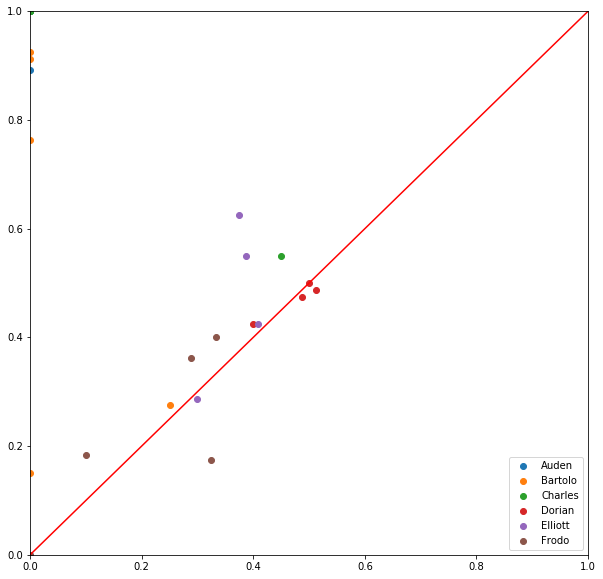

In [30]:
def evaluate_behavior(datasheet, namelist=None):
    if namelist is None:
        namelist = list(set(datasheet['name'].values))
    
    plt.figure(figsize=(10,10))
    namelist.sort()
    for each_mouse in namelist:
        targets = list(filter(lambda x: x[1] is each_mouse, datasheet.values))
        far = [item[3] for item in targets]
        hit = [item[2] for item in targets]
        #print(hit)
        plt.scatter(far,hit, label=each_mouse)
    
    plt.plot([0,1],[0,1],'r')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.legend(loc='lower right')
    plt.show()

sheet = pd.read_csv("rate_summary.csv")
evaluate_behavior(sheet)